# Tutorial 3

### 1. Implement and study the code and data given in [https://www.nltk.org/book/ch05.html](https://www.nltk.org/book/ch05.html) and prepare a report/summary using code segments and brief about that.

In [1]:
from nltk import *
import nltk

### Tagging is the 2nd step in a typical NLP pipeline after tokenization. It is the process of classifying words into their parts of speech and labeling them accordingly. The report is mainly focused on exploiting tags and tagging text automatically

## 1. Using a tagger
### A POS-tagger processes a sequence of words and attaches a part of speech tag to each word.

In [2]:
text = word_tokenize("Now, let's discuss something about Tagging")
nltk.pos_tag(text)

[('Now', 'RB'),
 (',', ','),
 ('let', 'VB'),
 ("'s", 'POS'),
 ('discuss', 'VB'),
 ('something', 'NN'),
 ('about', 'IN'),
 ('Tagging', 'VBG')]

### The classification showed above are as follows
### 1. RB:	adverb (occasionally, swiftly)
### 2. VB:	verb (ask)
### 3. POS:	possessive ending (parent\ ‘s)
### 4. NN:	noun, singular (cat, tree)
### 5. IN:	preposition/subordinating conjunction
### 6. VBG:	verb gerund (judging)

### These are some examples of NLTK POS tags. NLTK POS tagger is used to assign grammatical information of each word of the sentence

## 2. Tagged Corpora

### 2.1 Tagged tokens are represented using a tuple consisting of the token and the tag.

In [3]:
nltk.tag.str2tuple('Hello/NN')

('Hello', 'NN')

### 2.2 Exploring a tagged corpora

### The example shown below is for finding out three word phrases in a given sentence involving a particular sequence of tags and words. Here, it's  `<Verb> to <Verb>`. The phrases are from the brown corpus.

In [4]:
from nltk.corpus import brown

def process(sentence) :
    try:
        for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
            if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
                print(w1, w2, w3)
    except StopIteration:
        pass

for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

## 3. Mapping words to properties using Python Dictionaries

### Dictionaries are very useful in storing (word, tag) as `(key, value)` pairs and results in easier representation and utilization. Once a dictionary is populated using such word, tag pairs, we can employ the keys to retrieve their respective values. A very simple example would be:


In [5]:
pos = {}
pos['colorless'] = 'ADJ'
print(pos)
pos['ideas'] = 'N'
pos['sleep'] = 'V'
pos['furiously'] = 'ADV'
pos

{'colorless': 'ADJ'}


{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [7]:
print(pos.keys())
print(pos.values())
print(pos.items())

dict_keys(['colorless', 'ideas', 'sleep', 'furiously'])
dict_values(['ADJ', 'N', 'V', 'ADV'])
dict_items([('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')])


## 4. Automatic Tagging

### Now we will explore various ways to automatically add part-of-speech tags to text. 

In [8]:
from nltk.corpus import brown
tagged_sents = brown.tagged_sents(categories='news')
sents = brown.sents(categories='news')

### 4.1 Default Tagger

### Tagging each word with the most likely tag or the same tag.

In [9]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]
nltk.FreqDist(tags).max()

'NN'

In [10]:
# creating a tagger that tags everything as NN.
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = nltk.word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

In [12]:
# But uts evident that it performs poorly
default_tagger.evaluate(tagged_sents)

0.13089484257215028

### 4.2 Regular Expression Tagger

### The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun. 

In [13]:
patterns = [
    (r'.*ing$', 'VBG'),                # gerunds
    (r'.*ed$', 'VBD'),                 # simple past
    (r'.*es$', 'VBZ'),                 # 3rd singular present
    (r'.*ould$', 'MD'),                # modals
    (r'.*\'s$', 'NN$'),                # possessive nouns
    (r'.*s$', 'NNS'),                  # plural nouns
    (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
    (r'.*', 'NN')                      # nouns (default)
]

regexp_tagger = nltk.RegexpTagger(patterns)
regexp_tagger.tag(sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [16]:
regexp_tagger.evaluate(tagged_sents)

0.20186168625812995

### This is equivalent to the default tagger (only much less efficient).

### 4.3 Lookup Tagger

### A lot of high-frequency words do not have the NN tag. Let's find the hundred most frequent words and store their most likely tag. We can then use this information as the model for a "lookup tagger" (an NLTK UnigramTagger):

In [17]:
fd = nltk.FreqDist(brown.words(categories='news'))
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
most_freq_words = fd.most_common(100)
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)
baseline_tagger = nltk.UnigramTagger(model=likely_tags)
baseline_tagger.evaluate(tagged_sents)

0.45578495136941344

### It should come as no surprise by now that simply knowing the tags for the 100 most frequent words enables us to tag a large fraction of tokens correctly (nearly half in fact).

### Putting all of it together to evaluate lookup taggers:

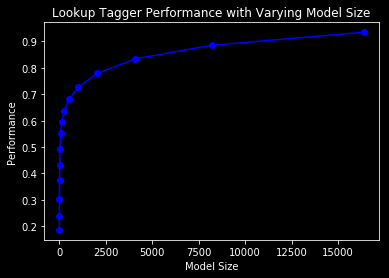

In [18]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()
display()

## 5. N-Gram Tagging

### 5.1 Unigram Tagging

### Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). A unigram tagger behaves just like a lookup tagger (4), except there is a more convenient technique for setting it up, called training. In the following code sample, we train a unigram tagger, use it to tag a sentence, then evaluate:

In [19]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [20]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### We train a UnigramTagger by specifying tagged sentence data as a parameter when we initialize the tagger. The training process involves inspecting the tag of each word and storing the most likely tag for any word in a dictionary, stored inside the tagger.

### 5.3 General N-Gram Tagging

### An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens, as shown in 5.1. The tag to be chosen, tn, is circled, and the context is shaded in grey. In the example of an n-gram tagger shown in 5.1, we have n=3; that is, we consider the tags of the two preceding words in addition to the current word. An n-gram tagger picks the tag that is most likely in the given context.

![image](https://www.nltk.org/images/tag-context.png)

### The NgramTagger class uses a tagged training corpus to determine which part-of-speech tag is most likely for each context. Here we see a special case of an n-gram tagger, namely a bigram tagger. First we train it, then use it to tag untagged sentences:

In [21]:
size = int(len(brown_tagged_sents) * 0.9)
print(size)

train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
unigram_tagger = nltk.UnigramTagger(train_sents)
unigram_tagger.evaluate(test_sents)

4160


0.8121200039868434

In [22]:
bigram_tagger = nltk.BigramTagger(train_sents)
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [23]:
unseen_sent = brown_sents[4203]
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

### We notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. Its overall accuracy score is very low:


In [24]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

## 6. Transformation-Based Tagging

### Brill tagging, an inductive tagging method which performs very well using models that are only a tiny fraction of the size of n-gram taggers.Brill tagging is a kind of transformation-based learning, named after its inventor. The general idea is very simple: guess the tag of each word, then go back and fix the mistakes. In this way, a Brill tagger successively transforms a bad tagging of a text into a better one. As with n-gram tagging, this is a supervised learning method, since we need annotated training data to figure out whether the tagger's guess is a mistake or not. However, unlike n-gram tagging, it does not count observations but compiles a list of transformational correction rules.

In [25]:
from nltk.tbl import demo as brill_demo
brill_demo.demo()

Loading tagged data from treebank... 
Read testing data (200 sents/5251 wds)
Read training data (800 sents/19933 wds)
Read baseline data (800 sents/19933 wds) [reused the training set]
Trained baseline tagger
    Accuracy on test set: 0.8366
Training tbl tagger...
TBL train (fast) (seqs: 800; tokens: 19933; tpls: 24; min score: 3; min acc: None)
Finding initial useful rules...
    Found 12799 useful rules.

           B      |
   S   F   r   O  |        Score = Fixed - Broken
   c   i   o   t  |  R     Fixed = num tags changed incorrect -> correct
   o   x   k   h  |  u     Broken = num tags changed correct -> incorrect
   r   e   e   e  |  l     Other = num tags changed incorrect -> incorrect
   e   d   n   r  |  e
------------------+-------------------------------------------------------
  23  23   0   0  | POS->VBZ if Pos:PRP@[-2,-1]
  18  19   1   0  | NN->VB if Pos:-NONE-@[-2] & Pos:TO@[-1]
  14  14   0   0  | VBP->VB if Pos:MD@[-2,-1]
  12  12   0   0  | VBP->VB if Pos:TO@[-1]
  

In [27]:
print(open("errors.out").read())

|              left context |    word/test->gold     | right context            |
|---------------------------|------------------------|--------------------------|
|                           |      Then/NN->RB       | ,/, in/IN the/DT guests/N|
| , in/IN the/DT guests/NNS |   **`'/VBD->POS` **    | **`honor/NN ,/, the/DT speed`**| 
| '/POS honor/NN ,/, the/DT |    speedway/JJ->NN     | hauled/VBD out/RP four/CD|
| NN ,/, the/DT speedway/NN |     hauled/NN->VBD     | out/RP four/CD drivers/NN|
| DT speedway/NN hauled/VBD |      out/NNP->RP       | four/CD drivers/NNS ,/, c|
| dway/NN hauled/VBD out/RP |      four/NNP->CD      | drivers/NNS ,/, crews/NNS|
| hauled/VBD out/RP four/CD |    drivers/NNP->NNS    | ,/, crews/NNS and/CC even|
| P four/CD drivers/NNS ,/, |     crews/NN->NNS      | and/CC even/RB the/DT off|
| NNS and/CC even/RB the/DT |    official/NNP->JJ    | Indianapolis/NNP 500/CD a|
|                           |     After/VBD->IN      | the/DT race/NN ,/, Fortun|
| ter/IN the/DT race/NN ,/, |    Fortune/IN->NNP     | 500/CD executives/NNS dro|
| s/NNS drooled/VBD like/IN |  schoolboys/NNP->NNS   | over/IN the/DT cars/NNS a|
| olboys/NNS over/IN the/DT |      cars/NN->NNS      | and/CC drivers/NNS ./.   |

### Brill Tagger Demonstration: the tagger has a collection of templates of the form X -> Y if the preceding word is Z; the variables in these templates are instantiated to particular words and tags to create "rules"; the score for a rule is the number of broken examples it corrects minus the number of correct cases it breaks; apart from training a tagger, the demonstration displays residual errors.

## Summary
> Words can be grouped into classes, such as nouns, verbs, adjectives, and adverbs. These classes are known as lexical categories or parts of speech. Parts of speech are assigned short labels, or tags, such as NN, VB,

> The process of automatically assigning parts of speech to words in text is called part-of-speech tagging, POS tagging, or just tagging

> Automatic tagging is an important step in the NLP pipeline, and is useful in a variety of situations including: predicting the behavior of previously unseen words, analyzing word usage in corpora, and text-to-speech systems

> Some linguistic corpora, such as the Brown Corpus, have been POS tagged

> A variety of tagging methods are possible, e.g. default tagger, regular expression tagger, unigram tagger and n-gram taggers. These can be combined using a technique known as backoff

> Taggers can be trained and evaluated using tagged corpora

> Backoff is a method for combining models: when a more specialized model (such as a bigram tagger) cannot assign a tag in a given context, we backoff to a more general model (such as a unigram tagger)

> Part-of-speech tagging is an important, early example of a sequence classification task in NLP: a classification decision at any one point in the sequence makes use of words and tags in the local context

> A dictionary is used to map between arbitrary types of information, such as a string and a number: freq['cat'] = 12. We create dictionaries using the brace notation: **`pos = {}`**, **`pos = {'furiously': 'adv', 'ideas': 'n', 'colorless': 'adj'}`**

> N-gram taggers can be defined for large values of n, but once n is larger than 3 we usually encounter the sparse data problem; even with a large quantity of training data we only see a tiny fraction of possible contexts

> Transformation-based tagging involves learning a series of repair rules of the form "*change tag s to tag t in context c*", where each rule fixes mistakes and possibly introduces a (smaller) number of errors.

## 2. Also explain (brief introduction and implemtation) any real time application of Tagging using any of the NLP application as the basis.

### In corpus linguistics, part-of-speech tagging (POS tagging or PoS tagging or POST), also called grammatical tagging is the process of marking up a word in a text (corpus) as corresponding to a particular part of speech, based on both its definition and its context. A simplified form of this is commonly taught to school-age children, in the identification of words as nouns, verbs, adjectives, adverbs, etc.

### Once performed by hand, POS tagging is now done in the context of computational linguistics, using algorithms which associate discrete terms, as well as hidden parts of speech, by a set of descriptive tags. POS-tagging algorithms fall into two distinctive groups: rule-based and stochastic. E. Brill's tagger, one of the first and most widely used English POS-taggers, employs rule-based algorithms.

### POS tagging finds applications in Named Entity Recognition (NER), sentiment analysis, question answering, and word sense disambiguation.

### Sentiment analysis (also known as opinion mining or emotion AI) is the use of natural language processing, text analysis, computational linguistics, and biometrics to systematically identify, extract, quantify, and study affective states and subjective information. Sentiment analysis is widely applied to voice of the customer materials such as reviews and survey responses, online and social media, and healthcare materials for applications that range from marketing to customer service to clinical medicine.

### A basic task in sentiment analysis is classifying the polarity of a given text at the document, sentence, or feature/aspect level—whether the expressed opinion in a document, a sentence or an entity feature/aspect is positive, negative, or neutral. Advanced, "beyond polarity" sentiment classification looks, for instance, at emotional states such as enjoyment, anger, disgust, sadness, fear, and surprise.

### What we find is that companies today are monitoring social media to improve sales, marketing, and customer service, including the evaluation of brand perception. Are people happy with our products? What do they not like about our product? How can we improve our service and offerings? Was our recent product launch/marketing conference well received by our partners and customers? How do customers view our competitors? These are questions that sales, marketing, and service departments in many companies are interested in.

### Social media sentiment analysis is also of interest to algorithmic trading systems. For example, some companies might be interested in building a predictive model that correlates the sentiment in Tweets with a stock symbol or a commodity future of interest. The system would have to compute a sentiment score for relevant tweets. One simple way of coming up with a sentiment score for a tweet would be to use a sentiment dictionary—a collection of positive and negative words (See Prof. Jason Baldridge for a comprehensive tutorial on Practical Sentiment Analysis). By looking up the words in the tweet with those in the sentiment dictionary, one can define the ratio of positive words in a tweet to the total number of positive and negative words as the sentiment score for the tweet.

### There are several pitfalls in this approach, and one key problem is the absence of context. To incorporate such contextual information into our simple sentiment scoring algorithm, we first need to extract phrases from the tweets. We can then count the number of tweets in which each phrase occurred as a very strong, positive adjective like “excellent” and the number of occurrences with a very strong negative adjective like “poor.” Using these two counts, we can come-up with a sentiment score for the extracted phrase, and ‘strong winds’ is likely to have a negative score while ‘strong yield’ is likely to have a positive score.

### The extraction of such adjectives along with their context is the building block of a seminal paper on sentiment analysis by Peter Turney. The task that helps us extract these contextual phrases is a well-studied problem in natural language processing (NLP) called parts-of-speech (POS) tagging. POS tagging of raw text is a fundamental building block of many NLP pipelines such as word-sense disambiguation, question answering and sentiment analysis. In its simplest form, given a sentence, POS tagging is the task of identifying nouns, verbs, adjectives, adverbs, and more. In practice, many NLP tasks use a much richer tagset for part-of-speech, the Penn Treebank corpus for instance, has a tagset of 36 POS tags.